Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset, including barris among predictors

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed_2019.pkl")

In [4]:
data.reset_index(drop=True, inplace=True)

In [5]:
data.head()

,Would_live_in_another_neighborhood,District,Woman,Car,Support_with_housework,Owner,House_size,No_of_people_in_the_house,Financial_situation,Disability,...,BCN_transport,Barri_problem_with_security,Barri_problem_with_streets_cleaning,Barri_problem_with_mobility,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_security
0,0.0,SANTS - MONTJUÏC,0,1,0.0,1.0,51-100 M2,TWO,GOOD,0.0,...,GOOD,0,0,0,0,0,0,0,0,0
1,0.0,SANTS - MONTJUÏC,1,0,0.0,1.0,51-100 M2,ONE,BAD,0.0,...,GOOD,0,0,0,1,0,0,0,0,0
2,0.0,SANTS - MONTJUÏC,1,0,1.0,0.0,51-100 M2,ONE,GOOD,0.0,...,"NEITHER BAD, NOR GOOD",0,0,0,0,0,0,1,0,0
3,1.0,SANTS - MONTJUÏC,0,0,0.0,1.0,< 50 M2,TWO,BAD,1.0,...,GOOD,0,0,0,0,0,1,0,0,0
4,0.0,SANTS - MONTJUÏC,1,0,1.0,1.0,51-100 M2,TWO,GOOD,0.0,...,GOOD,0,1,0,0,1,0,0,0,0


In [6]:
data.shape

(1174, 35)

In [7]:
for i in data.columns.tolist():
    display(pd.crosstab(data[i], data.Would_live_in_another_neighborhood))

Would_live_in_another_neighborhood,0.0,1.0
Would_live_in_another_neighborhood,,
0.0,1019,0
1.0,0,155


Would_live_in_another_neighborhood,0.0,1.0
District,,
CIUTAT VELLA,61,8
EIXAMPLE,179,20
GRÀCIA,84,12
HORTA - GUINARDÓ,112,21
LES CORTS,104,4
NOU BARRIS,94,23
SANT ANDREU,83,22
SANT MARTÍ,129,18
SANTS - MONTJUÏC,80,22


Would_live_in_another_neighborhood,0.0,1.0
Woman,,
0,399,61
1,620,94


Would_live_in_another_neighborhood,0.0,1.0
Car,,
0,479,63
1,540,92


Would_live_in_another_neighborhood,0.0,1.0
Support_with_housework,,
0.0,656,110
1.0,363,45


Would_live_in_another_neighborhood,0.0,1.0
Owner,,
0.0,210,28
1.0,809,127


Would_live_in_another_neighborhood,0.0,1.0
House_size,,
101-150 M2,126,15
51-100 M2,724,115
< 50 M2,57,14
> 150 M2,43,5
I DON'T KNOW,69,6


Would_live_in_another_neighborhood,0.0,1.0
No_of_people_in_the_house,,
ONE,353,52
THREE OR MORE,137,24
TWO,529,79


Would_live_in_another_neighborhood,0.0,1.0
Financial_situation,,
BAD,390,63
GOOD,629,92


Would_live_in_another_neighborhood,0.0,1.0
Disability,,
0.0,856,121
1.0,163,34


Would_live_in_another_neighborhood,0.0,1.0
Living_with_disabled_person,,
0,722,105
1,297,50


Would_live_in_another_neighborhood,0.0,1.0
Time_living_in_barri,,
I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD,136,7
LESS THAN 10 YEARS,57,16
MORE THAN 10 YEARS,826,132


Would_live_in_another_neighborhood,0.0,1.0
Barri_evolution,,
IT HAS IMPROVED,411,59
IT HAS WORSENED,230,46
IT IS THE SAME,378,50


Would_live_in_another_neighborhood,0.0,1.0
BCN_evolution,,
IT HAS IMPROVED,272,36
IT HAS WORSENED,517,85
IT IS THE SAME,230,34


Would_live_in_another_neighborhood,0.0,1.0
Barri_future,,
IT WILL IMPROVE,577,79
IT WILL STAY THE SAME,288,45
IT WILL WORSEN,154,31


Would_live_in_another_neighborhood,0.0,1.0
BCN_future,,
IT WILL IMPROVE,546,92
IT WILL STAY THE SAME,241,32
IT WILL WORSEN,232,31


Would_live_in_another_neighborhood,0.0,1.0
Barri_satisfaction,,
FAIRLY SATISFIED,75,25
NOT SATISFIED,1,9
SATISFIED,943,121


Would_live_in_another_neighborhood,0.0,1.0
BCN_satisfaction,,
FAIRLY SATISFIED,118,22
NOT SATISFIED,8,1
SATISFIED,893,132


Would_live_in_another_neighborhood,0.0,1.0
Barri_security,,
BAD,152,40
GOOD,455,49
"NEITHER BAD, NOR GOOD",412,66


Would_live_in_another_neighborhood,0.0,1.0
BCN_security,,
BAD,199,40
GOOD,285,38
"NEITHER BAD, NOR GOOD",535,77


Would_live_in_another_neighborhood,0.0,1.0
Barri_management,,
BAD,65,17
GOOD,509,56
"NEITHER BAD, NOR GOOD",445,82


Would_live_in_another_neighborhood,0.0,1.0
BCN_management,,
BAD,96,21
GOOD,431,46
"NEITHER BAD, NOR GOOD",492,88


Would_live_in_another_neighborhood,0.0,1.0
Barri_comparison,,
"NEITHER THE BEST, NOR THE WORST",341,94
ONE OF THE BEST,649,41
ONE OF THE WORST,29,20


Would_live_in_another_neighborhood,0.0,1.0
Barri_association,,
0.0,805,128
1.0,214,27


Would_live_in_another_neighborhood,0.0,1.0
Barri_transport,,
BAD,149,22
GOOD,812,120
"NEITHER BAD, NOR GOOD",58,13


Would_live_in_another_neighborhood,0.0,1.0
BCN_transport,,
BAD,95,21
GOOD,824,125
"NEITHER BAD, NOR GOOD",100,9


Would_live_in_another_neighborhood,0.0,1.0
Barri_problem_with_security,,
0,860,131
1,159,24


Would_live_in_another_neighborhood,0.0,1.0
Barri_problem_with_streets_cleaning,,
0,920,138
1,99,17


Would_live_in_another_neighborhood,0.0,1.0
Barri_problem_with_mobility,,
0,962,148
1,57,7


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_evolution,,
0,913,140
1,106,15


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_future,,
0,871,126
1,148,29


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_satisfaction,,
0,968,126
1,51,29


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_transport,,
0,921,146
1,98,9


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_management,,
0,983,147
1,36,8


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_security,,
0,973,145
1,46,10


In [8]:
data.columns.tolist()

['Would_live_in_another_neighborhood',
 'District',
 'Woman',
 'Car',
 'Support_with_housework',
 'Owner',
 'House_size',
 'No_of_people_in_the_house',
 'Financial_situation',
 'Disability',
 'Living_with_disabled_person',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction',
 'BCN_satisfaction',
 'Barri_security',
 'BCN_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'Barri_association',
 'Barri_transport',
 'BCN_transport',
 'Barri_problem_with_security',
 'Barri_problem_with_streets_cleaning',
 'Barri_problem_with_mobility',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_security']

In [9]:
x_var = ['District', # neighbourhood & city
 'Woman', # gender
 'Car', # support / health
 'Support_with_housework', # support
 'Owner', # housing
 'House_size', # housing
 'No_of_people_in_the_house', # housing
 'Financial_situation', # financial situation
 'Disability', # health
 'Living_with_disabled_person', # health
 'Time_living_in_barri', # attachment
 'Barri_evolution', # neighbourhood & city
 'Barri_future', # neighbourhood & city
 'Barri_satisfaction', # neighbourhood & city
 'Barri_security', # neighbourhood & city
 'Barri_management', # neighbourhood & city
 'Barri_comparison', # neighbourhood & city
 'Barri_association', # neighbourhood & city
 'Barri_transport', # neighbourhood & city
 'BCN_over_barri_evolution', # neighbourhood & city
 'BCN_over_barri_future', # neighbourhood & city
 'BCN_over_barri_satisfaction', # neighbourhood & city
 'BCN_over_barri_transport', # neighbourhood & city
 'BCN_over_barri_management', # neighbourhood & city
 'BCN_over_barri_security'] # neighbourhood & city

In [10]:
y = data['Would_live_in_another_neighborhood']

In [11]:
x = pd.get_dummies(data[x_var])

In [12]:
x.columns.tolist()

['Woman',
 'Car',
 'Support_with_housework',
 'Owner',
 'Disability',
 'Living_with_disabled_person',
 'Barri_association',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_security',
 'District_CIUTAT VELLA',
 'District_EIXAMPLE',
 'District_GRÀCIA',
 'District_HORTA - GUINARDÓ',
 'District_LES CORTS',
 'District_NOU BARRIS',
 'District_SANT ANDREU',
 'District_SANT MARTÍ',
 'District_SANTS - MONTJUÏC',
 'District_SARRIÀ - SANT GERVASI',
 'House_size_101-150 M2',
 'House_size_51-100 M2',
 'House_size_< 50 M2',
 'House_size_> 150 M2',
 "House_size_I DON'T KNOW",
 'No_of_people_in_the_house_ONE',
 'No_of_people_in_the_house_THREE OR MORE',
 'No_of_people_in_the_house_TWO',
 'Financial_situation_BAD',
 'Financial_situation_GOOD',
 'Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD',
 'Time_living_in_barri_LESS THAN 10 YEARS',
 'Time_living_in_barri_MORE THAN 10 YEA

In [13]:
for i in ['District_EIXAMPLE',
          'House_size_< 50 M2',
          'No_of_people_in_the_house_ONE',
          'Financial_situation_GOOD',
          'Time_living_in_barri_LESS THAN 10 YEARS',
          'Barri_evolution_IT HAS IMPROVED',
          'Barri_future_IT WILL IMPROVE',
          'Barri_satisfaction_SATISFIED',
          'Barri_security_GOOD',
          'Barri_management_GOOD',
          'Barri_comparison_ONE OF THE BEST',
          'Barri_transport_GOOD']:
    del x[i]

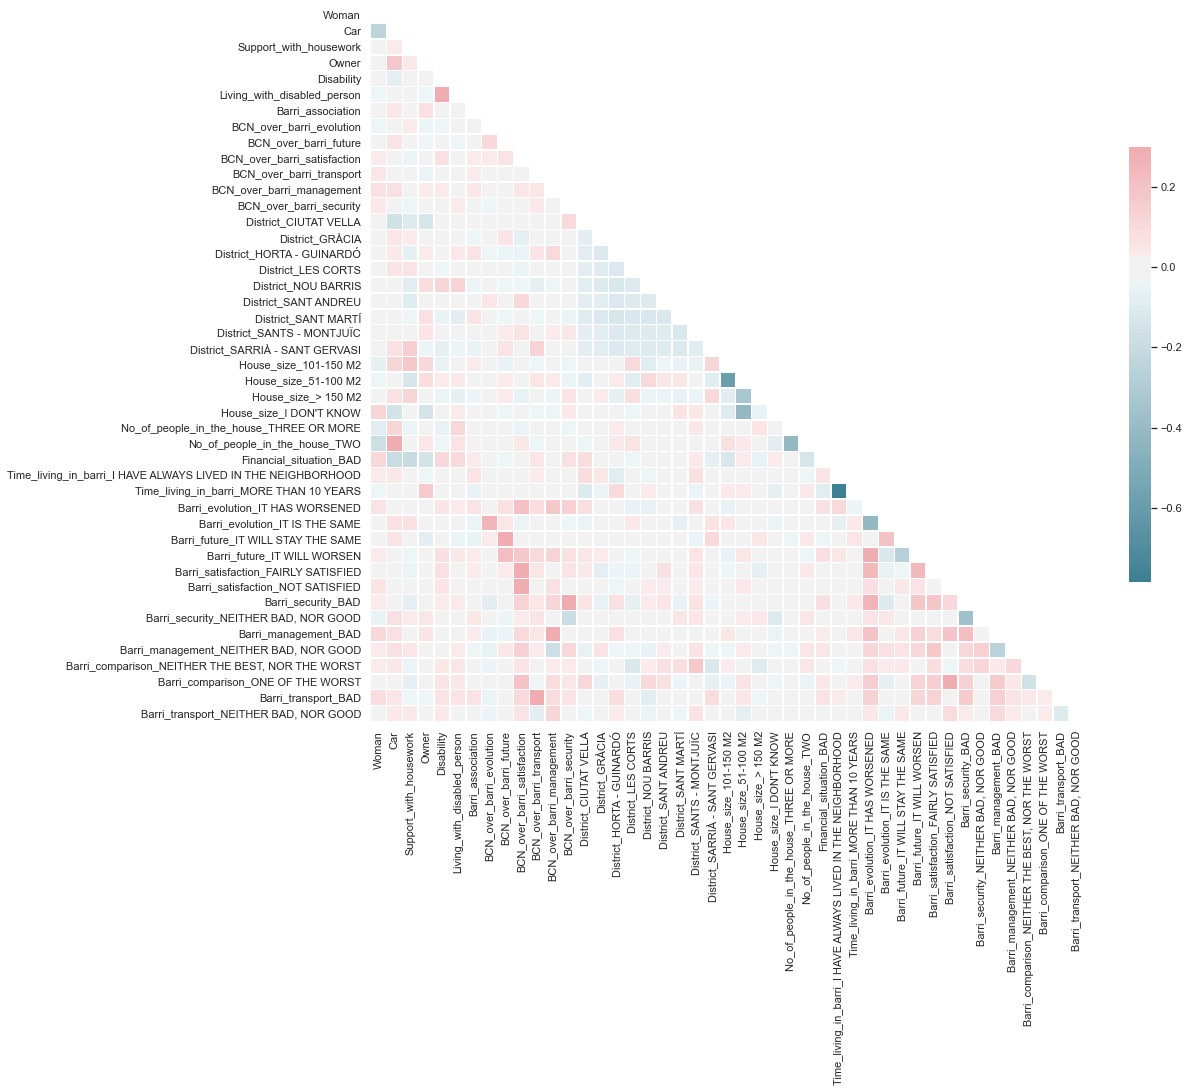

In [14]:
import seaborn as sns # just a conventional alias, don't know why
sns.set(style="white")

corr = x.corr('spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, #annot = corr.round(2), 
            linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
x = sm.add_constant(x)

# Models

In [16]:
sm.families.family.Binomial.links

[statsmodels.genmod.families.links.logit,
 statsmodels.genmod.families.links.probit,
 statsmodels.genmod.families.links.cauchy,
 statsmodels.genmod.families.links.log,
 statsmodels.genmod.families.links.cloglog,
 statsmodels.genmod.families.links.identity]

# Logit

In [17]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1174
Model:                                            GLM   Df Residuals:                     1128
Model Family:                                Binomial   Df Model:                           45
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -378.03
Date:                                Mon, 10 May 2021   Deviance:                       756.07
Time:                                        07:55:39   Pearson chi2:                 1.27e+03
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.7351      0.567     -3.060      0.002      -2.846      -0.624
Woman                                                           -0.0866      0.208     -0.416      0.678      -0.495       0.322
Car                                                              0.3230      0.231      1.395      0.163      -0.131       0.777
Support_with_housework                                           0.0613      0.226      0.272      0.786      -0.381       0.504
Owner                                                            0.1178      0.279      0.423      0.672      -0.428       0.664
Disability                                                       0.3229      0.376      0.859      0.390      -0.414       1.060
Living_with_disabled_person                                     -0.2684      0.323     -0.830      0.406      -0.902       0.365
Barri_association                                               -0.3978      0.256     -1.553      0.120      -0.900       0.104
BCN_over_barri_evolution                                         0.0709      0.352      0.201      0.840      -0.619       0.761
BCN_over_barri_future                                            0.4188      0.303      1.383      0.167      -0.174       1.012
BCN_over_barri_satisfaction                                      1.1520      0.652      1.767      0.077      -0.126       2.430
BCN_over_barri_transport                                        -0.7979      0.526     -1.516      0.129      -1.829       0.234
BCN_over_barri_management                                       -0.4310      0.695     -0.620      0.535      -1.793       0.931
BCN_over_barri_security                                          0.0060      0.461      0.013      0.990      -0.898       0.911
District_CIUTAT VELLA                                            0.1098      0.523      0.210      0.834      -0.916       1.135
District_GRÀCIA                                                  0.4800      0.421      1.139      0.255      -0.346       1.306
District_HORTA - GUINARDÓ                                        0.6358      0.377      1.686      0.092      -0.103       1.375
District_LES CORTS                                              -0.8014      0.587     -1.365      0.172      -1.952       0.349
District_NOU BARRIS                                              0.6037      0.391      1.545      0.122      -0.162       1.370
District_SANT ANDREU                                             0.49

In [18]:
glm_logit_results.aic

848.0653966481343

In [19]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7216.832619789578

In [20]:
glm_logit_results.pvalues.sort_values(ascending=False)

BCN_over_barri_security                                         9.895544e-01
Barri_future_IT WILL WORSEN                                     9.793927e-01
House_size_> 150 M2                                             8.854685e-01
No_of_people_in_the_house_THREE OR MORE                         8.629247e-01
BCN_over_barri_evolution                                        8.404676e-01
District_CIUTAT VELLA                                           8.338171e-01
Barri_transport_NEITHER BAD, NOR GOOD                           8.238460e-01
District_SANT MARTÍ                                             7.967103e-01
Support_with_housework                                          7.858226e-01
Financial_situation_BAD                                         7.448398e-01
Barri_future_IT WILL STAY THE SAME                              7.078002e-01
Woman                                                           6.776462e-01
Owner                                                           6.723614e-01

In [21]:
for i in x.columns.tolist():
    if i[:8] == 'District':
        del x[i]

In [22]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1174
Model:                                            GLM   Df Residuals:                     1137
Model Family:                                Binomial   Df Model:                           36
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -384.58
Date:                                Mon, 10 May 2021   Deviance:                       769.17
Time:                                        07:55:39   Pearson chi2:                 1.20e+03
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.6511      0.502     -3.288      0.001      -2.635      -0.667
Woman                                                           -0.0831      0.207     -0.401      0.688      -0.489       0.323
Car                                                              0.2959      0.226      1.310      0.190      -0.147       0.739
Support_with_housework                                          -0.0583      0.217     -0.268      0.788      -0.484       0.367
Owner                                                            0.2509      0.268      0.937      0.349      -0.274       0.776
Disability                                                       0.4080      0.370      1.103      0.270      -0.317       1.133
Living_with_disabled_person                                     -0.2537      0.317     -0.800      0.424      -0.876       0.368
Barri_association                                               -0.3546      0.252     -1.409      0.159      -0.848       0.139
BCN_over_barri_evolution                                         0.0791      0.348      0.227      0.820      -0.603       0.761
BCN_over_barri_future                                            0.4115      0.297      1.386      0.166      -0.170       0.993
BCN_over_barri_satisfaction                                      1.1493      0.640      1.796      0.072      -0.105       2.403
BCN_over_barri_transport                                        -0.7787      0.521     -1.494      0.135      -1.800       0.243
BCN_over_barri_management                                       -0.2616      0.688     -0.380      0.704      -1.610       1.087
BCN_over_barri_security                                         -0.0833      0.458     -0.182      0.856      -0.981       0.814
House_size_101-150 M2                                           -0.7177      0.476     -1.508      0.132      -1.650       0.215
House_size_51-100 M2                                            -0.4051      0.367     -1.104      0.270      -1.124       0.314
House_size_> 150 M2                                             -0.2934      0.627     -0.468      0.640      -1.522       0.935
House_size_I DON'T KNOW                                         -0.8326      0.559     -1.488      0.137      -1.929       0.264
No_of_people_in_the_house_THREE OR MORE                          0.1004      0.328      0.306      0.759      -0.542       0.743
No_of_people_in_the_house_TWO                                   -0.14

In [23]:
glm_logit_results.aic

843.167098686094

In [24]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7267.34446575511

In [25]:
glm_logit_results.pvalues.sort_values(ascending=False)

BCN_over_barri_security                                         8.555888e-01
Barri_transport_NEITHER BAD, NOR GOOD                           8.408699e-01
BCN_over_barri_evolution                                        8.201745e-01
Barri_future_IT WILL WORSEN                                     8.040117e-01
Support_with_housework                                          7.883499e-01
No_of_people_in_the_house_THREE OR MORE                         7.592878e-01
BCN_over_barri_management                                       7.036785e-01
Woman                                                           6.881677e-01
Barri_management_BAD                                            6.727678e-01
Financial_situation_BAD                                         6.653441e-01
House_size_> 150 M2                                             6.398366e-01
Barri_transport_BAD                                             5.936606e-01
Barri_future_IT WILL STAY THE SAME                              5.733969e-01

In [26]:
for i in ['BCN_over_barri_security', 
          'Barri_transport_NEITHER BAD, NOR GOOD', 'Barri_transport_BAD',
          'BCN_over_barri_evolution',
          'Barri_future_IT WILL WORSEN', 'Barri_future_IT WILL STAY THE SAME',
          'Support_with_housework',
          'No_of_people_in_the_house_THREE OR MORE', 'No_of_people_in_the_house_TWO',
          'BCN_over_barri_management', 
          'Woman',
          'Barri_management_BAD', 'Barri_management_NEITHER BAD, NOR GOOD',
          'Financial_situation_BAD',
          'Living_with_disabled_person',
          'Owner',
          'Barri_evolution_IT HAS WORSENED', 'Barri_evolution_IT IS THE SAME']:
    del x[i]

In [27]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1174
Model:                                            GLM   Df Residuals:                     1155
Model Family:                                Binomial   Df Model:                           18
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -388.30
Date:                                Mon, 10 May 2021   Deviance:                       776.61
Time:                                        07:55:39   Pearson chi2:                 1.20e+03
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.7329      0.434     -3.991      0.000      -2.584      -0.882
Car                                                              0.2794      0.198      1.408      0.159      -0.110       0.668
Disability                                                       0.2210      0.237      0.932      0.352      -0.244       0.686
Barri_association                                               -0.3216      0.247     -1.303      0.193      -0.805       0.162
BCN_over_barri_future                                            0.2875      0.247      1.165      0.244      -0.196       0.771
BCN_over_barri_satisfaction                                      1.1548      0.616      1.874      0.061      -0.053       2.362
BCN_over_barri_transport                                        -0.6224      0.384     -1.623      0.105      -1.374       0.129
House_size_101-150 M2                                           -0.7172      0.450     -1.595      0.111      -1.599       0.164
House_size_51-100 M2                                            -0.4152      0.350     -1.187      0.235      -1.101       0.271
House_size_> 150 M2                                             -0.3239      0.604     -0.536      0.592      -1.509       0.861
House_size_I DON'T KNOW                                         -0.8824      0.548     -1.611      0.107      -1.956       0.191
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -2.0417      0.519     -3.936      0.000      -3.059      -1.025
Time_living_in_barri_MORE THAN 10 YEARS                         -0.8599      0.328     -2.625      0.009      -1.502      -0.218
Barri_satisfaction_FAIRLY SATISFIED                             -0.3337      0.569     -0.587      0.557      -1.448       0.781
Barri_satisfaction_NOT SATISFIED                                 2.3725      1.258      1.885      0.059      -0.094       4.839
Barri_security_BAD                                               0.4173      0.266      1.566      0.117      -0.105       0.940
Barri_security_NEITHER BAD, NOR GOOD                             0.1458      0.219      0.665      0.506      -0.284       0.575
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.3841      0.208      6.639      0.000       0.976       1.793
Barri_comparison_ONE OF THE WORST                                1.7269      0.400      4.322      0.000       0.944       2.510
=====================================================================

In [28]:
glm_logit_results.aic

814.6069095963435

In [29]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7387.131750851846

In [30]:
glm_logit_results.pvalues.sort_values(ascending=False)

House_size_> 150 M2                                             5.920576e-01
Barri_satisfaction_FAIRLY SATISFIED                             5.572292e-01
Barri_security_NEITHER BAD, NOR GOOD                            5.060778e-01
Disability                                                      3.515676e-01
BCN_over_barri_future                                           2.438381e-01
House_size_51-100 M2                                            2.353125e-01
Barri_association                                               1.925844e-01
Car                                                             1.591564e-01
Barri_security_BAD                                              1.173587e-01
House_size_101-150 M2                                           1.107579e-01
House_size_I DON'T KNOW                                         1.071568e-01
BCN_over_barri_transport                                        1.046880e-01
BCN_over_barri_satisfaction                                     6.089526e-02

In [31]:
for i in ['House_size_> 150 M2', 'House_size_51-100 M2', 'House_size_101-150 M2', "House_size_I DON'T KNOW",
          'Barri_security_NEITHER BAD, NOR GOOD', 'Barri_security_BAD',
          'Disability',
          'BCN_over_barri_future']:
    del x[i]

In [32]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1174
Model:                                            GLM   Df Residuals:                     1163
Model Family:                                Binomial   Df Model:                           10
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -392.64
Date:                                Mon, 10 May 2021   Deviance:                       785.28
Time:                                        07:55:39   Pearson chi2:                 1.20e+03
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.0310      0.332     -6.125      0.000      -2.681      -1.381
Car                                                              0.2674      0.190      1.410      0.159      -0.104       0.639
Barri_association                                               -0.3362      0.245     -1.374      0.170      -0.816       0.144
BCN_over_barri_satisfaction                                      1.2272      0.606      2.027      0.043       0.040       2.414
BCN_over_barri_transport                                        -0.5764      0.381     -1.512      0.130      -1.323       0.171
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.9318      0.509     -3.794      0.000      -2.930      -0.934
Time_living_in_barri_MORE THAN 10 YEARS                         -0.8069      0.318     -2.541      0.011      -1.429      -0.185
Barri_satisfaction_FAIRLY SATISFIED                             -0.2607      0.557     -0.468      0.640      -1.353       0.832
Barri_satisfaction_NOT SATISFIED                                 2.4164      1.244      1.943      0.052      -0.022       4.854
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.4247      0.203      7.012      0.000       1.027       1.823
Barri_comparison_ONE OF THE WORST                                1.8505      0.392      4.725      0.000       1.083       2.618
================================================================================================================================
"""

In [33]:
glm_logit_results.aic

807.2756625463222

In [34]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7435.00837390497

In [35]:
glm_logit_results.pvalues.sort_values(ascending=False)

Barri_satisfaction_FAIRLY SATISFIED                             6.400547e-01
Barri_association                                               1.695727e-01
Car                                                             1.586384e-01
BCN_over_barri_transport                                        1.304738e-01
Barri_satisfaction_NOT SATISFIED                                5.206538e-02
BCN_over_barri_satisfaction                                     4.270883e-02
Time_living_in_barri_MORE THAN 10 YEARS                         1.105484e-02
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    1.484941e-04
Barri_comparison_ONE OF THE WORST                               2.297955e-06
const                                                           9.063157e-10
Barri_comparison_NEITHER THE BEST, NOR THE WORST                2.342330e-12
dtype: float64

In [36]:
for i in ['Barri_association', 'Car']:
    del x[i]

In [37]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1174
Model:                                            GLM   Df Residuals:                     1165
Model Family:                                Binomial   Df Model:                            8
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -394.52
Date:                                Mon, 10 May 2021   Deviance:                       789.05
Time:                                        07:55:39   Pearson chi2:                 1.20e+03
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.9981      0.320     -6.241      0.000      -2.626      -1.371
BCN_over_barri_satisfaction                                      1.2280      0.606      2.028      0.043       0.041       2.415
BCN_over_barri_transport                                        -0.5766      0.380     -1.516      0.129      -1.322       0.169
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.8835      0.507     -3.717      0.000      -2.877      -0.890
Time_living_in_barri_MORE THAN 10 YEARS                         -0.7452      0.315     -2.369      0.018      -1.362      -0.129
Barri_satisfaction_FAIRLY SATISFIED                             -0.2804      0.558     -0.502      0.615      -1.374       0.814
Barri_satisfaction_NOT SATISFIED                                 2.4712      1.248      1.980      0.048       0.025       4.918
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.4279      0.202      7.052      0.000       1.031       1.825
Barri_comparison_ONE OF THE WORST                                1.8370      0.391      4.703      0.000       1.071       2.603
================================================================================================================================
"""

In [38]:
glm_logit_results.aic

807.0457852244397

In [39]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7445.3745952276295

In [40]:
glm_logit_results.pvalues.sort_values(ascending=False)

Barri_satisfaction_FAIRLY SATISFIED                             6.154491e-01
BCN_over_barri_transport                                        1.294818e-01
Barri_satisfaction_NOT SATISFIED                                4.773037e-02
BCN_over_barri_satisfaction                                     4.256402e-02
Time_living_in_barri_MORE THAN 10 YEARS                         1.783851e-02
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    2.017497e-04
Barri_comparison_ONE OF THE WORST                               2.568241e-06
const                                                           4.353585e-10
Barri_comparison_NEITHER THE BEST, NOR THE WORST                1.767500e-12
dtype: float64

In [41]:
for i in ['BCN_over_barri_transport']:
    del x[i]

In [42]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1174
Model:                                            GLM   Df Residuals:                     1166
Model Family:                                Binomial   Df Model:                            7
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -395.82
Date:                                Mon, 10 May 2021   Deviance:                       791.64
Time:                                        07:55:40   Pearson chi2:                 1.22e+03
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.0282      0.320     -6.337      0.000      -2.656      -1.401
BCN_over_barri_satisfaction                                      1.2623      0.601      2.100      0.036       0.084       2.440
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.9077      0.509     -3.749      0.000      -2.905      -0.910
Time_living_in_barri_MORE THAN 10 YEARS                         -0.7535      0.314     -2.397      0.017      -1.370      -0.137
Barri_satisfaction_FAIRLY SATISFIED                             -0.3200      0.554     -0.578      0.564      -1.406       0.766
Barri_satisfaction_NOT SATISFIED                                 2.3289      1.224      1.903      0.057      -0.069       4.727
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.4191      0.202      7.023      0.000       1.023       1.815
Barri_comparison_ONE OF THE WORST                                1.8636      0.390      4.775      0.000       1.099       2.629
================================================================================================================================
"""

In [43]:
glm_logit_results.aic

807.6358393000108

In [44]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7449.852713152447

In [45]:
glm_logit_results.pvalues.sort_values(ascending=False)

Barri_satisfaction_FAIRLY SATISFIED                             5.635220e-01
Barri_satisfaction_NOT SATISFIED                                5.699655e-02
BCN_over_barri_satisfaction                                     3.573131e-02
Time_living_in_barri_MORE THAN 10 YEARS                         1.653556e-02
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    1.774428e-04
Barri_comparison_ONE OF THE WORST                               1.799348e-06
const                                                           2.344028e-10
Barri_comparison_NEITHER THE BEST, NOR THE WORST                2.165260e-12
dtype: float64

In [ ]:
glm_logit_results.predict()

In [46]:
def odds_ratios(results):
    return np.exp(results.params)

In [47]:
odds_ratios(glm_logit_results)

const                                                            0.131570
BCN_over_barri_satisfaction                                      3.533595
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD     0.148423
Time_living_in_barri_MORE THAN 10 YEARS                          0.470697
Barri_satisfaction_FAIRLY SATISFIED                              0.726132
Barri_satisfaction_NOT SATISFIED                                10.266586
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 4.133216
Barri_comparison_ONE OF THE WORST                                6.446781
dtype: float64

In [48]:
def classification_table(results):
    df_classification_table = pd.DataFrame(y).join(pd.DataFrame(results.predict(x).round()))
    df_classification_table.rename(columns={'Would_live_in_another_neighborhood': 'y', 0: 'y_predict'}, inplace=True)
    return pd.crosstab(df_classification_table['y'], df_classification_table['y_predict'])

In [49]:
def plot_roc_auc(results):
    y_predict = results.predict(x)
    roc_auc = roc_auc_score(y, y_predict)
    fpr, tpr, thresholds = roc_curve(y, y_predict)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [50]:
# https://github.com/statsmodels/statsmodels/issues/5861
def pseudo_r2(results):
    return print("Pseudo R2:", (1 - results.llf / results.llnull))

In [51]:
def adj_count_r2(results):
    df_classification_table = pd.DataFrame(y).join(pd.DataFrame(results.predict(x).round()))
    df_classification_table.rename(columns={'Would_live_in_another_neighborhood': 'y', 0: 'y_predict'}, inplace=True)
    df = pd.crosstab(df_classification_table['y'], df_classification_table['y_predict'])
    return print("Adj Count R2:", round((df[0][0] + df[1][1] - (df[0][0]+df[1][0]))/(df[0][1]+df[1][1]),3))

In [52]:
classification_table(glm_logit_results)

y_predict,0.0,1.0
y,,
0.0,1017,2
1.0,139,16


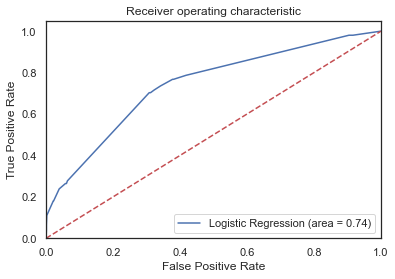

In [53]:
plot_roc_auc(glm_logit_results)

In [54]:
pseudo_r2(glm_logit_results)

Pseudo R2: 0.1359970697611943


In [55]:
adj_count_r2(glm_logit_results)

Adj Count R2: 0.09


# Probit

In [56]:
glm_probit = sm.GLM(y, x, family=sm.families.Binomial(link=sm.genmod.families.links.probit))
glm_probit_results = glm_probit.fit()
glm_probit_results.summary()

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1174
Model:                                            GLM   Df Residuals:                     1166
Model Family:                                Binomial   Df Model:                            7
Link Function:                                 probit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -396.53
Date:                                Mon, 10 May 2021   Deviance:                       793.07
Time:                                        07:55:40   Pearson chi2:                 1.23e+03
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.1558      0.178     -6.504      0.000      -1.504      -0.808
BCN_over_barri_satisfaction                                      0.7072      0.336      2.105      0.035       0.049       1.366
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -0.9590      0.256     -3.749      0.000      -1.460      -0.458
Time_living_in_barri_MORE THAN 10 YEARS                         -0.4137      0.179     -2.317      0.020      -0.764      -0.064
Barri_satisfaction_FAIRLY SATISFIED                             -0.1838      0.305     -0.602      0.547      -0.782       0.414
Barri_satisfaction_NOT SATISFIED                                 1.3314      0.641      2.077      0.038       0.075       2.588
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 0.7441      0.104      7.170      0.000       0.541       0.947
Barri_comparison_ONE OF THE WORST                                0.9962      0.225      4.423      0.000       0.555       1.438
================================================================================================================================
"""

In [57]:
glm_probit_results.aic

809.066989007597

In [58]:
glm_probit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7448.421563444861

In [59]:
classification_table(glm_probit_results)

y_predict,0.0,1.0
y,,
0.0,1018,1
1.0,145,10


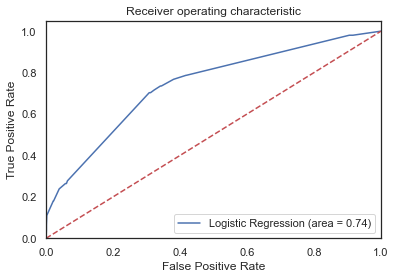

In [60]:
plot_roc_auc(glm_probit_results)

In [61]:
odds_ratios(glm_probit_results)

const                                                           0.314802
BCN_over_barri_satisfaction                                     2.028321
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    0.383264
Time_living_in_barri_MORE THAN 10 YEARS                         0.661169
Barri_satisfaction_FAIRLY SATISFIED                             0.832094
Barri_satisfaction_NOT SATISFIED                                3.786204
Barri_comparison_NEITHER THE BEST, NOR THE WORST                2.104500
Barri_comparison_ONE OF THE WORST                               2.708043
dtype: float64

In [62]:
pseudo_r2(glm_probit_results)

Pseudo R2: 0.13443509204419457


In [63]:
adj_count_r2(glm_probit_results)

Adj Count R2: 0.058


# Scobit

In [64]:
glm_scobit = sm.GLM(y, x, family=sm.families.Binomial(link=sm.genmod.families.links.cloglog))
glm_scobit_results = glm_scobit.fit()
glm_scobit_results.summary()

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1174
Model:                                            GLM   Df Residuals:                     1166
Model Family:                                Binomial   Df Model:                            7
Link Function:                                cloglog   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -396.14
Date:                                Mon, 10 May 2021   Deviance:                       792.28
Time:                                        07:55:41   Pearson chi2:                 1.20e+03
No. Iterations:                                     8                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.1305      0.282     -7.564      0.000      -2.683      -1.578
BCN_over_barri_satisfaction                                      1.0290      0.492      2.090      0.037       0.064       1.994
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.7037      0.455     -3.746      0.000      -2.595      -0.812
Time_living_in_barri_MORE THAN 10 YEARS                         -0.6778      0.268     -2.531      0.011      -1.203      -0.153
Barri_satisfaction_FAIRLY SATISFIED                             -0.2007      0.467     -0.430      0.667      -1.115       0.714
Barri_satisfaction_NOT SATISFIED                                 1.1048      0.675      1.638      0.101      -0.217       2.427
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.3232      0.189      7.013      0.000       0.953       1.693
Barri_comparison_ONE OF THE WORST                                1.6846      0.326      5.167      0.000       1.046       2.324
================================================================================================================================
"""

In [65]:
glm_scobit_results.aic

808.2819070297534

In [66]:
glm_scobit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7449.206645422704

In [67]:
classification_table(glm_scobit_results)

y_predict,0.0,1.0
y,,
0.0,1017,2
1.0,140,15


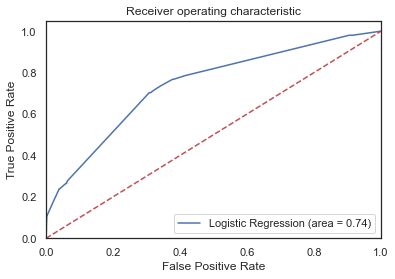

In [68]:
plot_roc_auc(glm_scobit_results)

In [69]:
odds_ratios(glm_scobit_results)

const                                                           0.118779
BCN_over_barri_satisfaction                                     2.798382
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    0.182015
Time_living_in_barri_MORE THAN 10 YEARS                         0.507708
Barri_satisfaction_FAIRLY SATISFIED                             0.818196
Barri_satisfaction_NOT SATISFIED                                3.018493
Barri_comparison_NEITHER THE BEST, NOR THE WORST                3.755494
Barri_comparison_ONE OF THE WORST                               5.390427
dtype: float64

In [70]:
pseudo_r2(glm_scobit_results)

Pseudo R2: 0.13529194199421013


In [71]:
adj_count_r2(glm_scobit_results)

Adj Count R2: 0.084


# Results comparison

In [72]:
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1174
Model:                                            GLM   Df Residuals:                     1166
Model Family:                                Binomial   Df Model:                            7
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -395.82
Date:                                Mon, 10 May 2021   Deviance:                       791.64
Time:                                        07:55:42   Pearson chi2:                 1.22e+03
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.0282      0.320     -6.337      0.000      -2.656      -1.401
BCN_over_barri_satisfaction                                      1.2623      0.601      2.100      0.036       0.084       2.440
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.9077      0.509     -3.749      0.000      -2.905      -0.910
Time_living_in_barri_MORE THAN 10 YEARS                         -0.7535      0.314     -2.397      0.017      -1.370      -0.137
Barri_satisfaction_FAIRLY SATISFIED                             -0.3200      0.554     -0.578      0.564      -1.406       0.766
Barri_satisfaction_NOT SATISFIED                                 2.3289      1.224      1.903      0.057      -0.069       4.727
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.4191      0.202      7.023      0.000       1.023       1.815
Barri_comparison_ONE OF THE WORST                                1.8636      0.390      4.775      0.000       1.099       2.629
================================================================================================================================
"""

In [73]:
glm_probit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1174
Model:                                            GLM   Df Residuals:                     1166
Model Family:                                Binomial   Df Model:                            7
Link Function:                                 probit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -396.53
Date:                                Mon, 10 May 2021   Deviance:                       793.07
Time:                                        07:55:42   Pearson chi2:                 1.23e+03
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.1558      0.178     -6.504      0.000      -1.504      -0.808
BCN_over_barri_satisfaction                                      0.7072      0.336      2.105      0.035       0.049       1.366
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -0.9590      0.256     -3.749      0.000      -1.460      -0.458
Time_living_in_barri_MORE THAN 10 YEARS                         -0.4137      0.179     -2.317      0.020      -0.764      -0.064
Barri_satisfaction_FAIRLY SATISFIED                             -0.1838      0.305     -0.602      0.547      -0.782       0.414
Barri_satisfaction_NOT SATISFIED                                 1.3314      0.641      2.077      0.038       0.075       2.588
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 0.7441      0.104      7.170      0.000       0.541       0.947
Barri_comparison_ONE OF THE WORST                                0.9962      0.225      4.423      0.000       0.555       1.438
================================================================================================================================
"""

In [74]:
glm_scobit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1174
Model:                                            GLM   Df Residuals:                     1166
Model Family:                                Binomial   Df Model:                            7
Link Function:                                cloglog   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -396.14
Date:                                Mon, 10 May 2021   Deviance:                       792.28
Time:                                        07:55:42   Pearson chi2:                 1.20e+03
No. Iterations:                                     8                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.1305      0.282     -7.564      0.000      -2.683      -1.578
BCN_over_barri_satisfaction                                      1.0290      0.492      2.090      0.037       0.064       1.994
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.7037      0.455     -3.746      0.000      -2.595      -0.812
Time_living_in_barri_MORE THAN 10 YEARS                         -0.6778      0.268     -2.531      0.011      -1.203      -0.153
Barri_satisfaction_FAIRLY SATISFIED                             -0.2007      0.467     -0.430      0.667      -1.115       0.714
Barri_satisfaction_NOT SATISFIED                                 1.1048      0.675      1.638      0.101      -0.217       2.427
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.3232      0.189      7.013      0.000       0.953       1.693
Barri_comparison_ONE OF THE WORST                                1.6846      0.326      5.167      0.000       1.046       2.324
================================================================================================================================
"""

In [75]:
classification_table(glm_logit_results)

y_predict,0.0,1.0
y,,
0.0,1017,2
1.0,139,16


In [76]:
classification_table(glm_probit_results)

y_predict,0.0,1.0
y,,
0.0,1018,1
1.0,145,10


In [77]:
classification_table(glm_scobit_results)

y_predict,0.0,1.0
y,,
0.0,1017,2
1.0,140,15


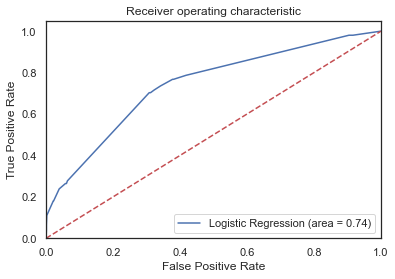

In [78]:
plot_roc_auc(glm_logit_results)

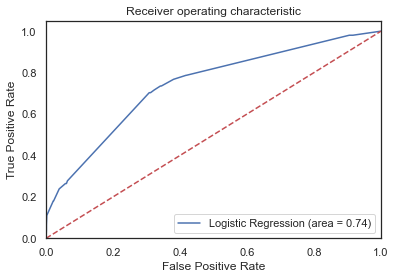

In [79]:
plot_roc_auc(glm_probit_results)

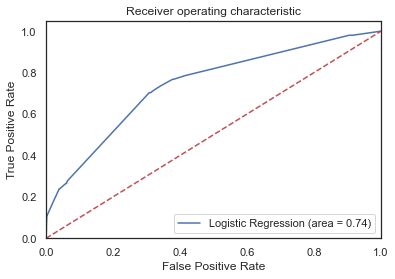

In [80]:
plot_roc_auc(glm_scobit_results)

In [81]:
print("Logit")
pseudo_r2(glm_logit_results)
adj_count_r2(glm_logit_results)

Logit
Pseudo R2: 0.1359970697611943
Adj Count R2: 0.09


In [82]:
print("Probit")
pseudo_r2(glm_probit_results)
adj_count_r2(glm_probit_results)

Probit
Pseudo R2: 0.13443509204419457
Adj Count R2: 0.058


In [83]:
print("Scobit")
pseudo_r2(glm_scobit_results)
adj_count_r2(glm_scobit_results)

Scobit
Pseudo R2: 0.13529194199421013
Adj Count R2: 0.084


In [84]:
print("Logit \n AIC:", glm_logit_results.aic, "BIC:", glm_logit_results.bic)

Logit 
 AIC: 807.6358393000108 BIC: -7449.852713152447


C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


In [85]:
print("Probit \n AIC:", glm_probit_results.aic, "BIC:", glm_probit_results.bic)

Probit 
 AIC: 809.066989007597 BIC: -7448.421563444861


In [86]:
print("Scobit \n AIC:", glm_scobit_results.aic, "BIC:", glm_scobit_results.bic)

Scobit 
 AIC: 808.2819070297534 BIC: -7449.206645422704
